In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

In [3]:
import pandas as pd
from sqlalchemy import create_engine
import warnings
engine2 = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

heartdisease_df = pd.read_sql_query('SELECT * FROM heartdisease',con=engine2)
engine2.dispose()

In [4]:
heartdisease_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
heartdisease_df['13'].unique()

array([0, 2, 1, 3, 4])

In [6]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by `?`) with a `0`
X = X.replace(to_replace='?', value=0)

# Binarize `y` so that `1` means heart disease diagnosis and `0` means no diagnosis
y = np.where(y > 0, 1, 0)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [8]:
# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

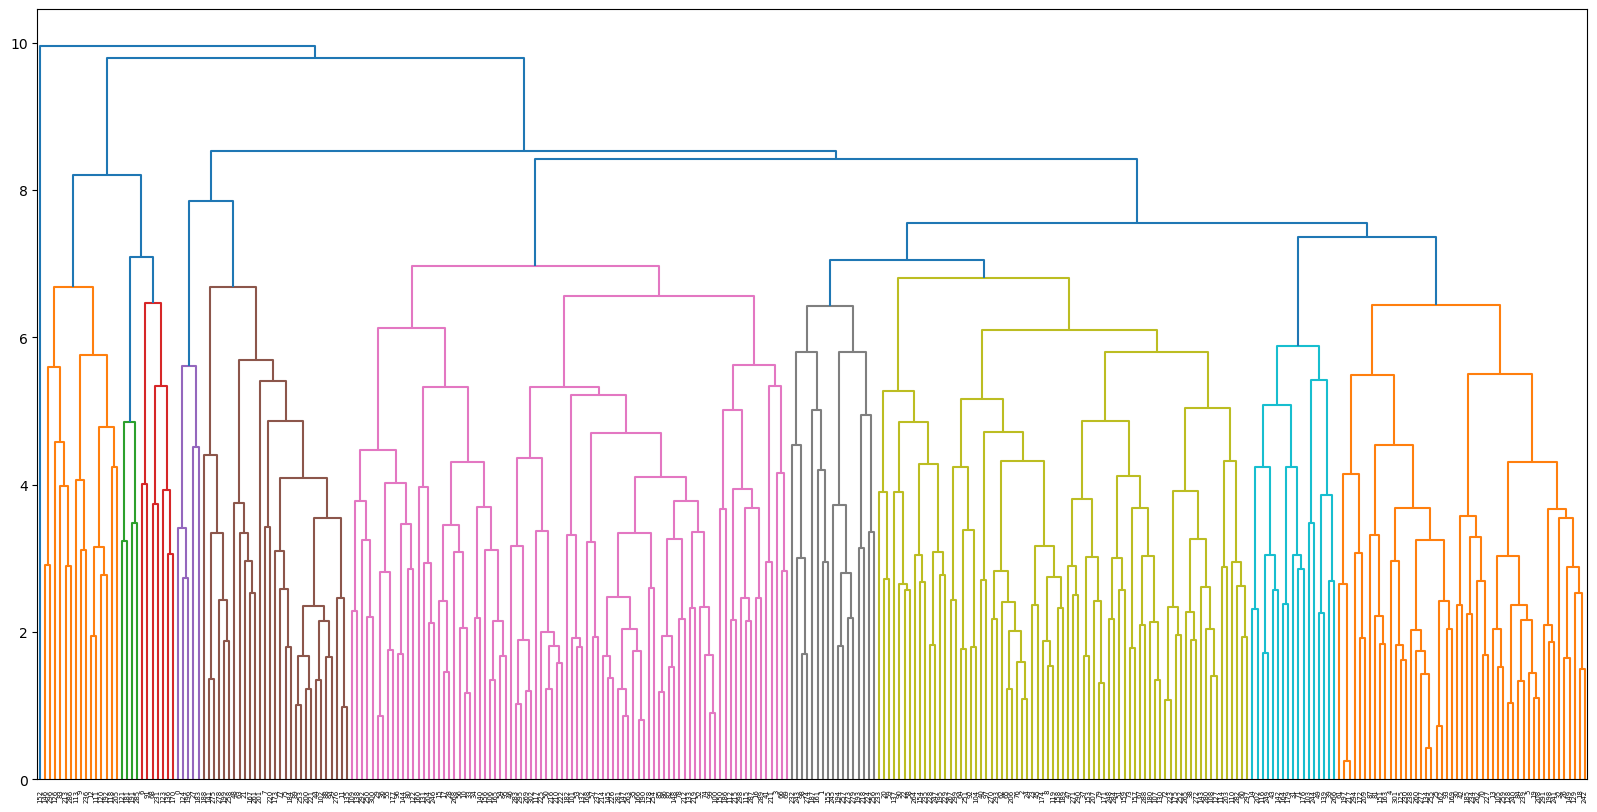

In [9]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='complete'))
plt.show()

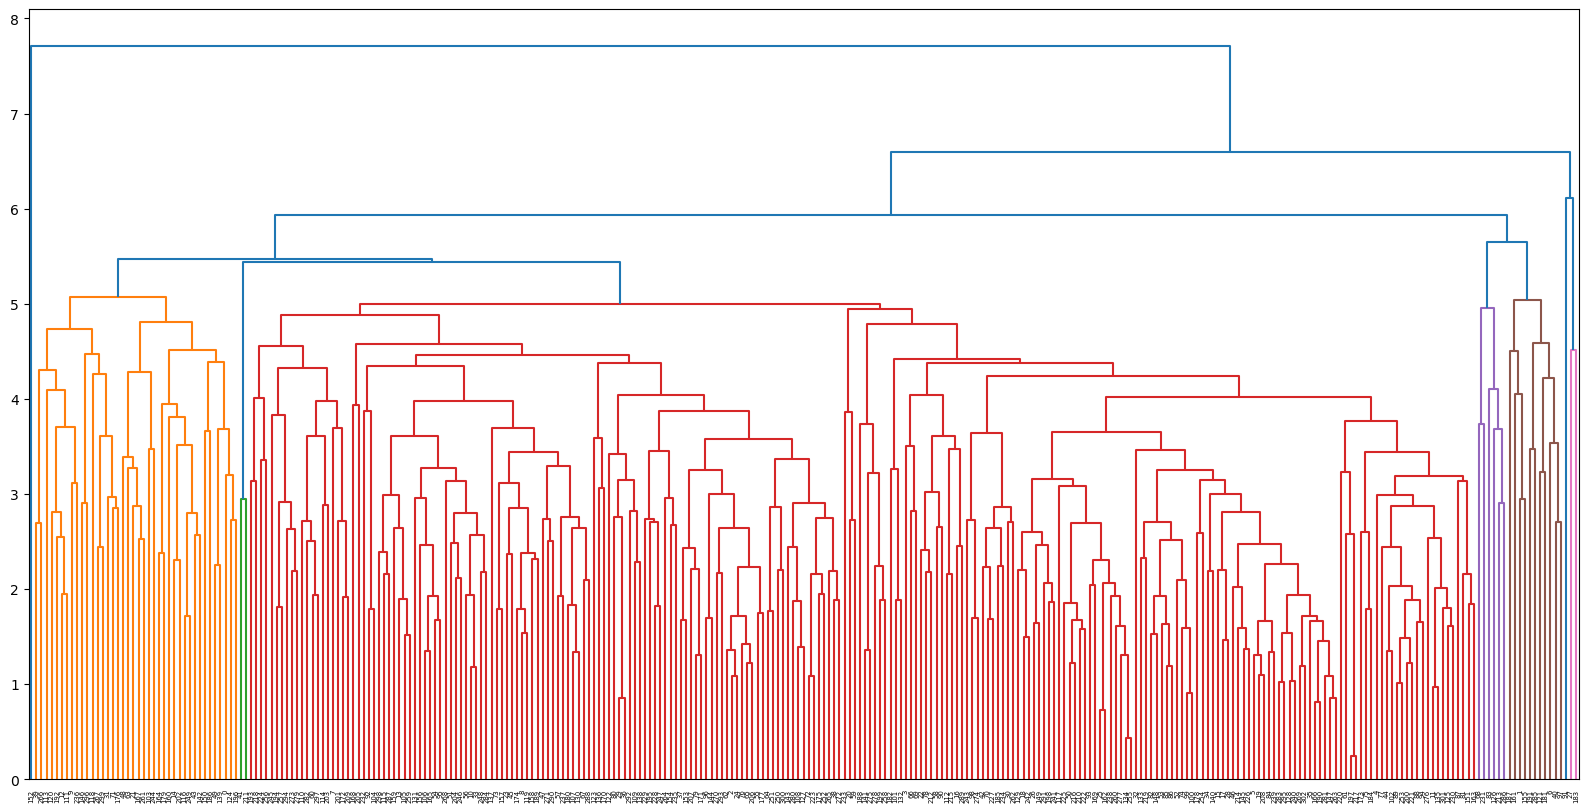

In [10]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='average'))
plt.show()

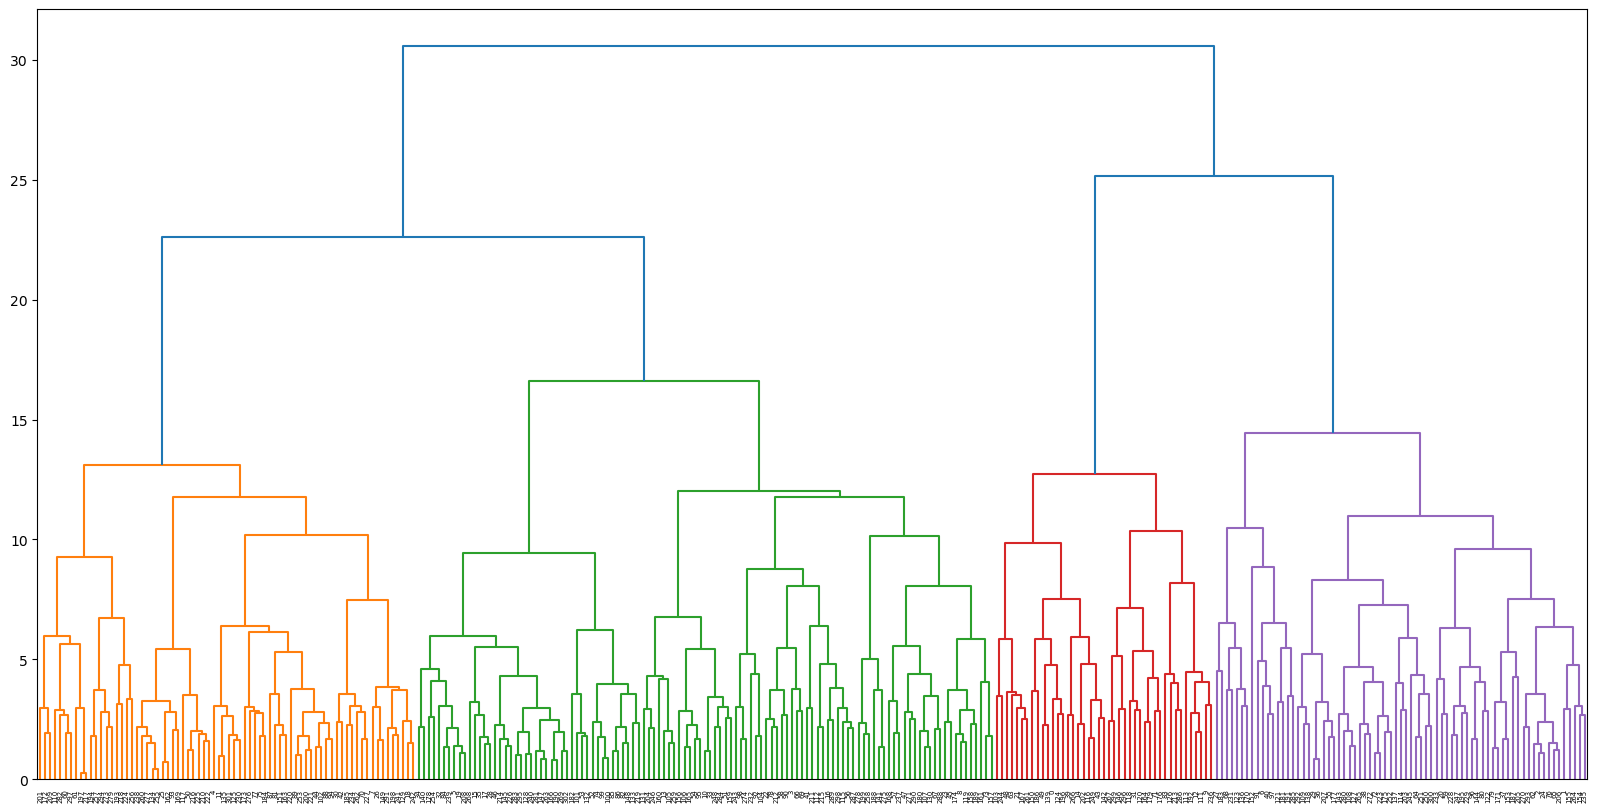

In [11]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='ward'))
plt.show()

In [13]:
# 
# Defining the agglomerative clustering
hdt={'complete':'cosine','ward':'euclidean','average':'cosine'}
for linkage,affinity in hdt.items(): 
 agg_cluster = AgglomerativeClustering(linkage=linkage, 
                                      affinity=affinity,
                                      n_clusters=2)

# Fit model
 clusters = agg_cluster.fit_predict(X_std)
 print("Adjusted Rand Index of the Agglomerative Clustering solution with {}: {}"
      .format(linkage,metrics.adjusted_rand_score(y, clusters)))
 print("The silhouette score of the Agglomerative Clustering solution with {} : {}"
      .format(linkage,metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering solution with complete: 0.21394030618551016
The silhouette score of the Agglomerative Clustering solution with complete : 0.11730765444448985
Adjusted Rand Index of the Agglomerative Clustering solution with ward: 0.146129913123814
The silhouette score of the Agglomerative Clustering solution with ward : 0.13871973665572218
Adjusted Rand Index of the Agglomerative Clustering solution with average: 0.29404901333534655
The silhouette score of the Agglomerative Clustering solution with average : 0.14837359969689895


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


## k means it was ``

silhouette_score: 0.17440650461256252
random index: 0.7183560317704781
adjusted random index: 0.43661540614807665

K means model perform better than Agglomerative hierarchial clustering  